### Image Resize: file version

In [39]:
from PIL import Image

def resize_image(input_path, output_path, new_width):
    try:
        image = Image.open(input_path)
        width_percent = (new_width / float(image.size[0]))
        new_height = int((float(image.size[1]) * float(width_percent)))
        resized_image = image.resize((new_width, new_height))
        resized_image.save(output_path)
        print(f"Image resized and saved to {output_path}")
    except Exception as e:
        print(f"Error: {e}")

# Replace 'input_image.jpg' and 'resized_output_image.jpg' with your file paths
input_image_path = 'testimage.jpg'
output_image_path = 'resized_output_image.jpg'

resize_image(input_image_path, output_image_path, new_width=100)  # Adjust the new width as needed


Image resized and saved to resized_output_image.jpg


### Converting to Numpy and Displaying: file version

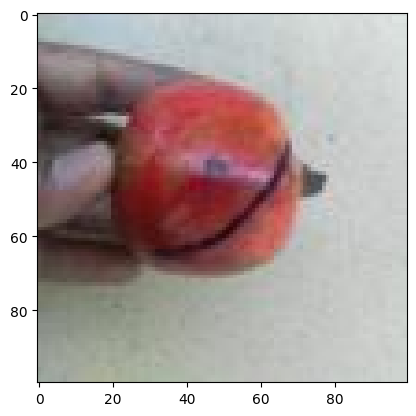

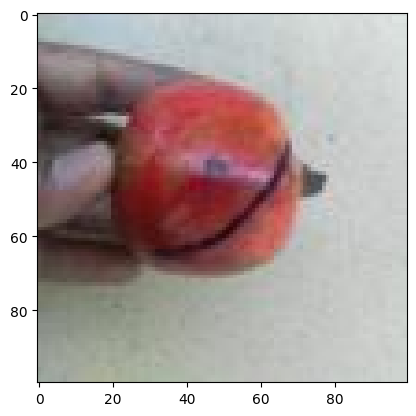

(100, 100, 3)


In [41]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = Image.open('resized_output_image.jpg')

# Convert the image to a numpy array
pixels = np.array(image)

# Save the numpy array as a .npy file
np.save('output.npy', pixels)

# Display the image
plt.imshow(pixels)
plt.show()

data = np.load("output.npy")
plt.imshow(data)
plt.show()

print(data.shape)


### Image Resize: folder version

In [42]:
import os
from PIL import Image

def resize_image(input_path, output_path, new_width):
    try:
        image = Image.open(input_path)
        width_percent = (new_width / float(image.size[0]))
        new_height = int((float(image.size[1]) * float(width_percent)))
        resized_image = image.resize((new_width, new_height))
        resized_image.save(output_path)
        print(f"Image resized and saved to {output_path}")
    except Exception as e:
        print(f"Error: {e}")

# Define the input directory and output directory
input_dir = 'pomegranate_bad_subset'
output_dir = 'pbs_resize'

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Get all files in the directory
files = os.listdir(input_dir)

# Process each file
for filename in files:
    # Check if the file is an image
    if filename.endswith('.jpg'):
        # Define the input path and output path
        input_path = os.path.join(input_dir, filename)
        output_path = os.path.join(output_dir, filename)

        # Resize the image
        resize_image(input_path, output_path, new_width=100)  # Adjust the new width as needed

Image resized and saved to pbs_resize\IMG_20190822_083956.jpg
Image resized and saved to pbs_resize\IMG_20190822_083957.jpg
Image resized and saved to pbs_resize\IMG_20190822_083958.jpg
Image resized and saved to pbs_resize\IMG_20190822_083958_1.jpg
Image resized and saved to pbs_resize\IMG_20190822_083959.jpg
Image resized and saved to pbs_resize\IMG_20190822_084000.jpg
Image resized and saved to pbs_resize\IMG_20190822_084001.jpg
Image resized and saved to pbs_resize\IMG_20190822_084002.jpg


### Converting to Numpy and Visualizing: folder version

(8, 100, 100, 3)
[[[176 182 182]
  [177 183 183]
  [179 184 187]
  ...
  [217 223 221]
  [216 222 220]
  [215 221 219]]

 [[176 185 184]
  [176 185 184]
  [176 184 186]
  ...
  [223 229 227]
  [223 229 227]
  [222 228 226]]

 [[177 189 187]
  [176 188 186]
  [173 187 187]
  ...
  [222 228 226]
  [221 227 225]
  [220 226 224]]

 ...

 [[148 158 149]
  [153 163 154]
  [157 167 158]
  ...
  [206 211 207]
  [206 211 207]
  [206 211 207]]

 [[152 162 153]
  [157 167 158]
  [158 168 159]
  ...
  [206 211 207]
  [206 211 207]
  [206 211 207]]

 [[155 165 156]
  [158 168 159]
  [158 168 159]
  ...
  [206 211 207]
  [206 211 207]
  [207 212 208]]]


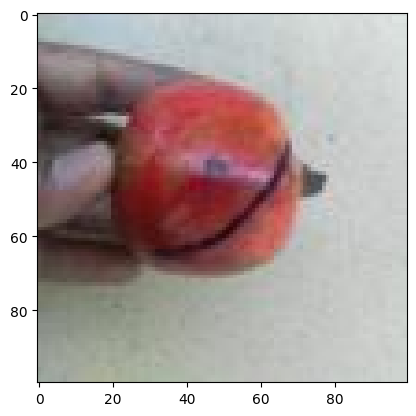

In [49]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Define the input directory
input_dir = 'pbs_resize'

# Get all files in the directory
files = os.listdir(input_dir)

# Initialize an empty list to store all image data
all_images = []

# Process each file
for filename in files:
    # Check if the file is an image
    if filename.endswith('.jpg'):
        # Define the input path
        input_path = os.path.join(input_dir, filename)

        # Load the image
        image = Image.open(input_path)

        # Convert the image to a numpy array
        pixels = np.array(image)

        # Add the image data to the list
        all_images.append(pixels)

# Convert the list of all image data to a numpy array
all_images_array = np.array(all_images)

# Save the numpy array as a .npy file
np.save('all_images.npy', all_images_array)

# Print the shape of the numpy array
print(all_images_array.shape)
print(all_images_array[0])
plt.imshow(all_images_array[0])

### Add labels to images: folder version

In [1]:
import pandas as pd
import numpy as np

# Example array of images (replace this with your array of images)
image1 = np.random.rand(32, 32, 3)  # Example image shape: 32x32x3 (height x width x channels)
image2 = np.random.rand(32, 32, 3)
image3 = np.random.rand(32, 32, 3)
images_array = np.array([image1, image2, image3])  # Array of images

# Example labels corresponding to the images
labels = np.array([0, 1, 0])  # Example labels (replace with your own labels)

# Combining images and labels
labeled_data = list(zip(images_array, labels))  # Combining images and labels using zip
# Accessing the labeled data
for image, label in labeled_data:
    # Here, 'image' is the image array and 'label' is its associated label
    print(f"Image Shape: {image.shape}, Label: {label}")

# Assuming images_array is your 4D numpy array of images and labels is your 1D numpy array of labels
df = pd.DataFrame({'Image': list(images_array), 'Label': labels})

# Now, each row in the DataFrame corresponds to an image and its label
print(df)


Image Shape: (32, 32, 3), Label: 0
Image Shape: (32, 32, 3), Label: 1
Image Shape: (32, 32, 3), Label: 0
                                               Image  Label
0  [[[0.16869664720290634, 0.19839028576977213, 0...      0
1  [[[0.1496530240067685, 0.6296332129496256, 0.9...      1
2  [[[0.6891894371648584, 0.5482374722959963, 0.2...      0
